In [1]:
# Common imports
import numpy as np
import pandas as pd
import os
# to make this notebook's output stable across runs
np.random.seed(40)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Loading the data
syn = pd.read_csv('synthetic.csv')

In [3]:
syn.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
0,-14.698830,2.369710,1.089267,-1.262030,-15.650082,-16.665997,15.909853,-11.121045,18.275820,-2.405075,...,-5.421817,15.233291,-3.484405,2.755223,9.766386,6.419560,6.618973,15.171849,1.926773,1
1,-8.457451,2.182712,0.972360,-4.255289,-11.524392,-4.843399,9.557964,-10.145921,6.655710,-2.821156,...,-5.398857,20.342647,-5.395054,2.816668,14.932127,9.134028,4.826775,12.077634,3.397375,0
2,-6.541517,1.263892,-0.494469,-2.562072,-8.979410,-23.632245,15.740920,-4.460916,-16.528412,-3.901285,...,-5.339781,10.859401,-2.095555,2.945595,14.778588,2.711564,-0.090958,-5.467509,3.088641,0
3,-18.139840,1.569545,-3.286717,-4.255045,-16.146687,-25.893126,12.005963,-2.228017,5.853151,-2.951831,...,-5.652446,-8.674892,-9.665123,8.876766,22.335086,10.194627,2.720710,-1.787331,-0.291131,0
4,-12.500957,2.313632,5.227138,2.586718,-15.022213,-3.105726,18.070314,-7.745197,0.300133,-3.364458,...,-5.551594,13.195368,-5.089818,12.362742,22.624796,4.407471,3.022274,-1.705888,6.650217,0


In [4]:
syn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
x1     1000 non-null float64
x2     1000 non-null float64
x3     1000 non-null float64
x4     1000 non-null float64
x5     1000 non-null float64
x6     1000 non-null float64
x7     1000 non-null float64
x8     1000 non-null float64
x9     1000 non-null float64
x10    1000 non-null float64
x11    1000 non-null float64
x12    1000 non-null float64
x13    1000 non-null float64
x14    1000 non-null float64
x15    1000 non-null float64
x16    1000 non-null float64
x17    1000 non-null float64
x18    1000 non-null float64
x19    1000 non-null float64
x20    1000 non-null float64
x21    1000 non-null float64
x22    1000 non-null float64
x23    1000 non-null float64
x24    1000 non-null float64
x25    1000 non-null float64
x26    1000 non-null float64
x27    1000 non-null float64
x28    1000 non-null float64
x29    1000 non-null float64
x30    1000 non-null float64
y      1000 non-null int

In [5]:
# Data Summary
syn.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-13.028746,2.182041,-0.331036,-1.501078,-12.622918,-10.854249,15.199978,-1.989472,6.407913,-2.926042,...,-5.472288,10.543841,-6.003123,3.746927,18.425973,2.742845,3.475475,1.864313,-1.137531,0.145000
std,3.659720,1.314388,4.259927,1.922640,3.604514,9.750920,7.206344,6.454849,16.872978,0.673362,...,0.272104,8.311382,1.873970,4.962534,6.134947,7.049830,2.048401,10.351793,8.543692,0.352277
min,-25.548066,-1.599455,-14.930338,-10.215498,-24.600418,-55.753091,-4.320908,-22.643235,-51.040173,-4.907236,...,-6.378320,-14.553686,-12.804169,-10.970233,-1.014732,-18.778590,-2.594584,-30.715194,-27.231646,0.000000
25%,-15.588659,1.285855,-3.149624,-2.808884,-15.109200,-17.120274,10.231755,-6.188742,-4.853568,-3.383162,...,-5.666194,4.728117,-7.268277,0.279869,14.232877,-2.051034,2.102943,-4.779697,-6.883752,0.000000
50%,-13.072938,2.170483,-0.367062,-1.510223,-12.498793,-11.170167,15.196222,-2.026093,6.431541,-2.928571,...,-5.467538,10.698797,-5.919298,3.841361,18.301716,2.989103,3.488600,1.362105,-1.012529,0.000000
75%,-10.534016,3.021294,2.485166,-0.237209,-10.214818,-4.522221,19.901376,2.392737,18.145285,-2.487445,...,-5.287631,16.268073,-4.677299,7.306957,22.495502,7.393532,4.913292,8.998301,4.753629,0.000000
max,-2.382520,6.026316,14.980421,5.101086,2.182904,23.826332,36.646915,19.820630,55.897492,-0.712244,...,-4.671847,36.154495,-0.188857,20.068337,36.539176,25.577773,9.590002,31.900767,31.280122,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103b930d0>,
      dtype=object)

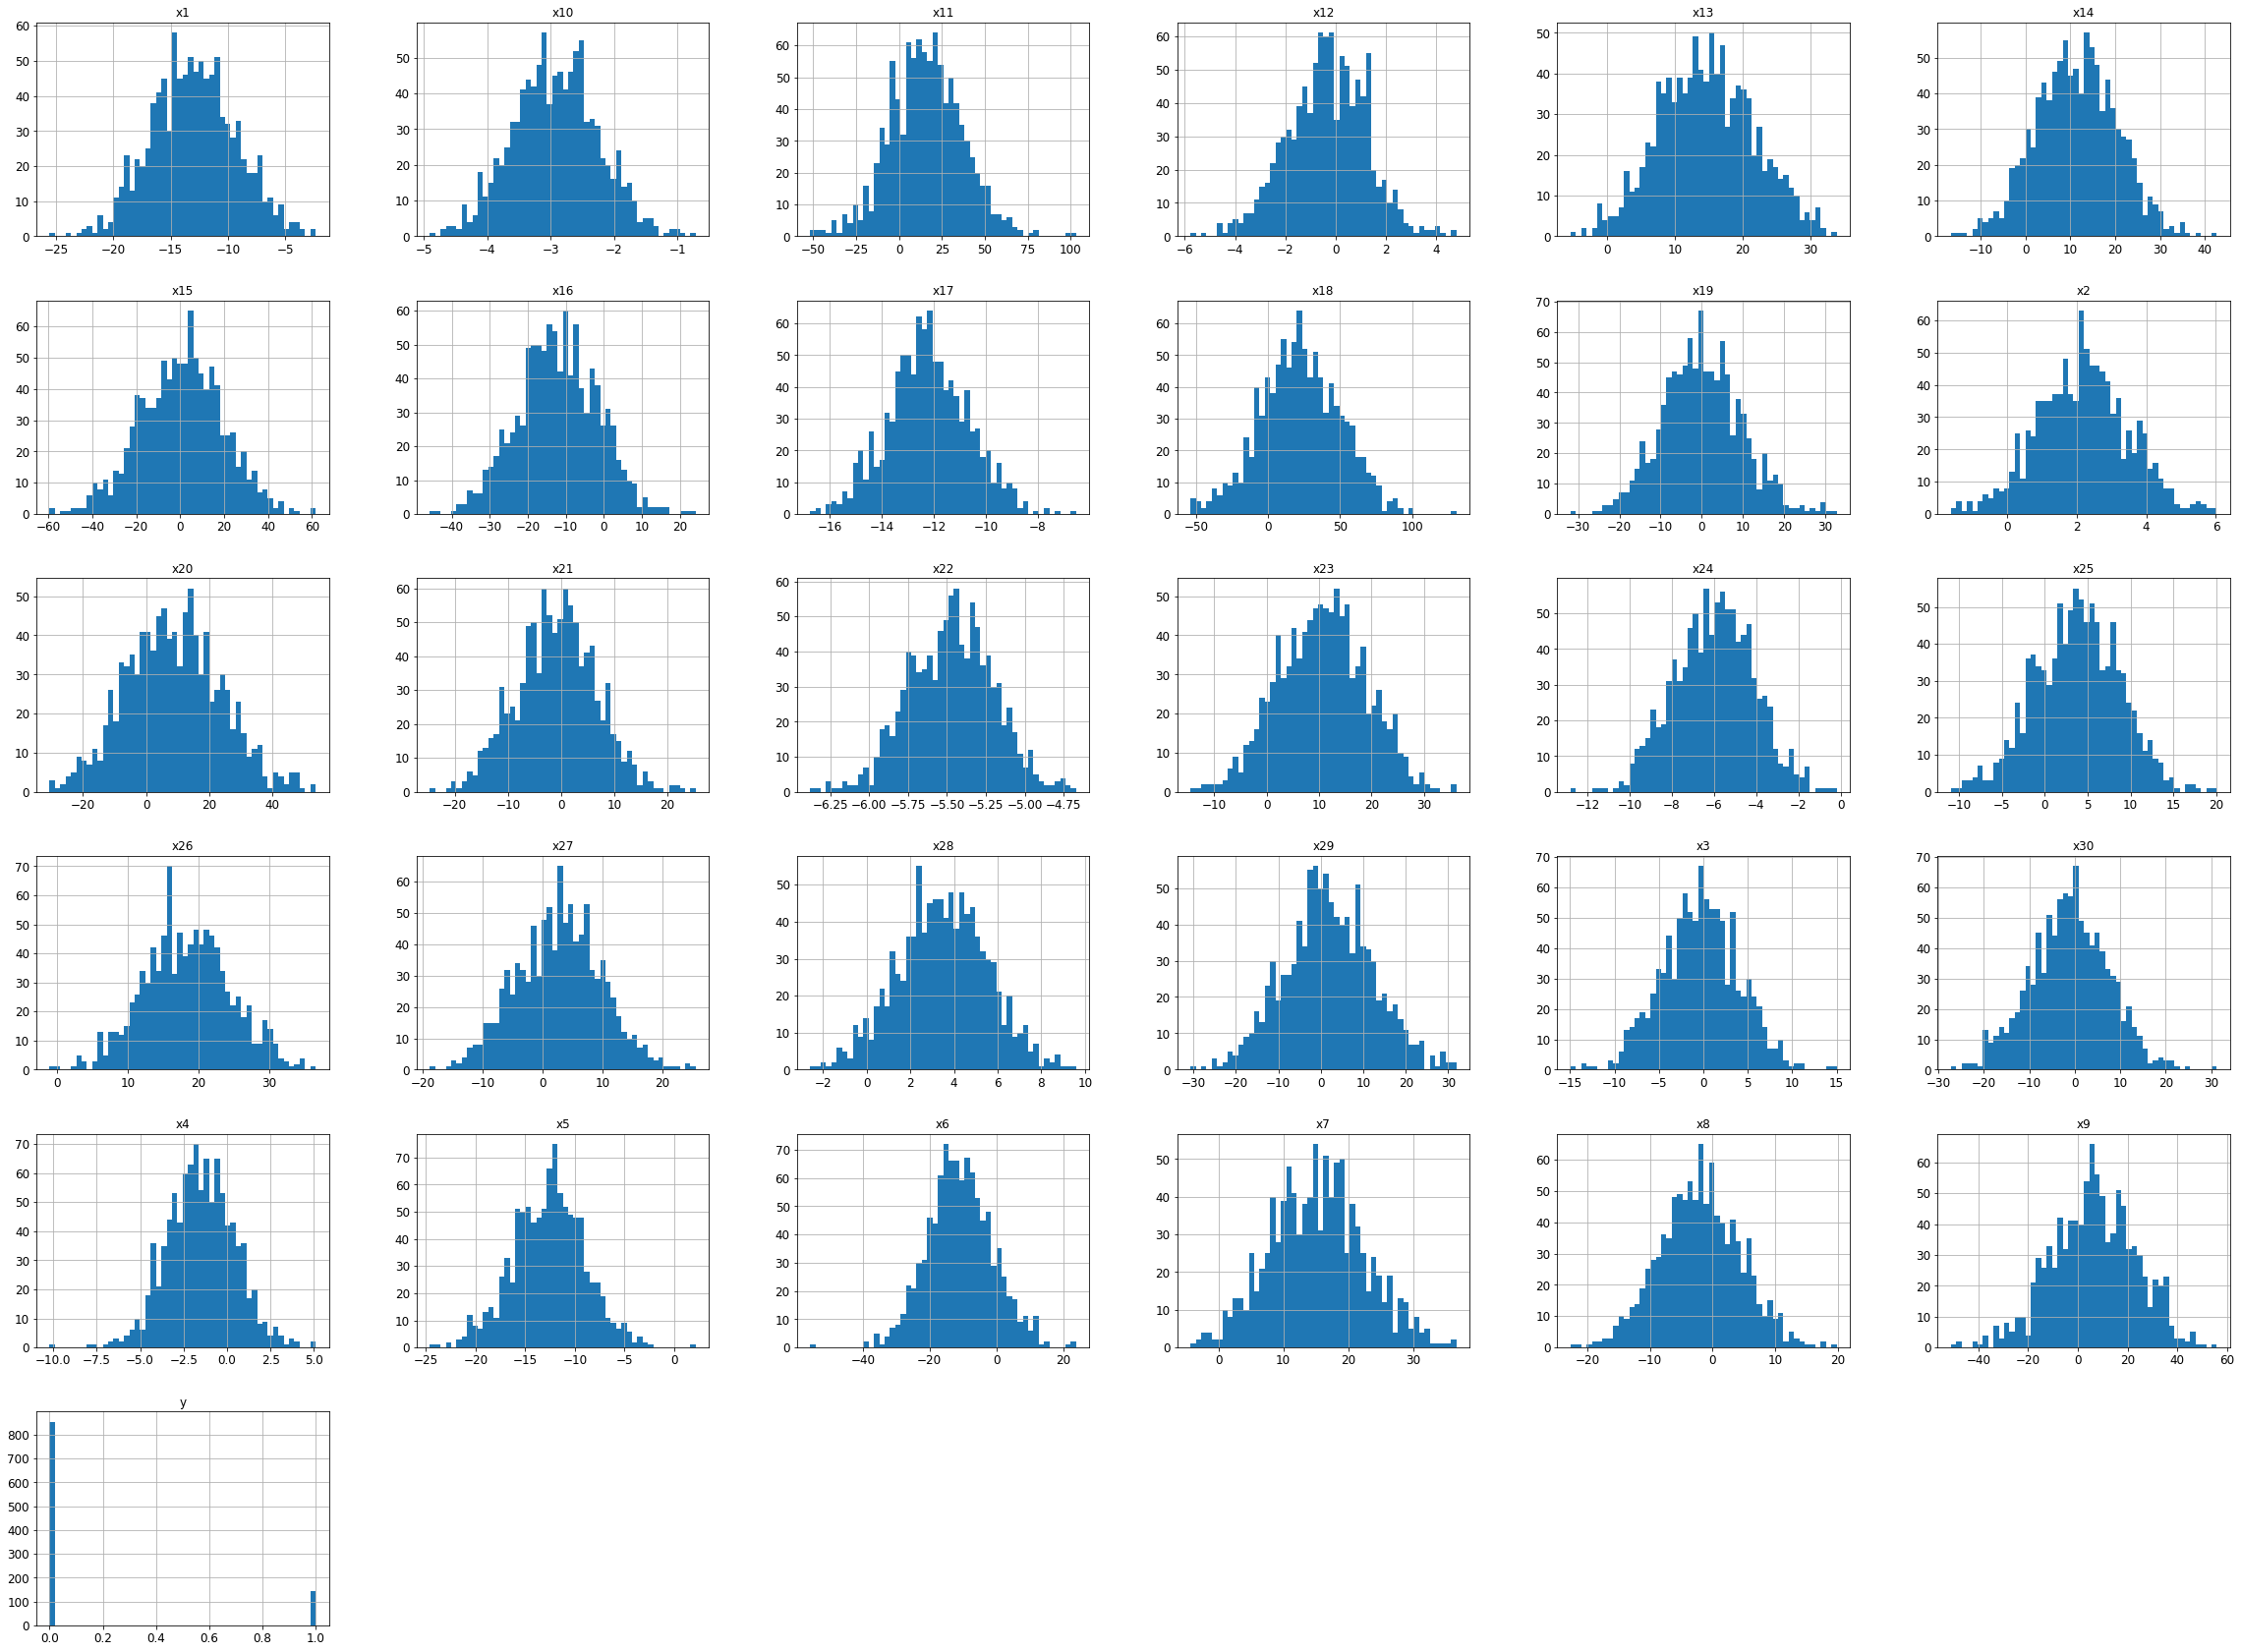

In [6]:
# Data Variables Visualisation
syn.hist(bins=50, figsize=(40,30))

In [7]:
# Dividing the data points into features and labels
features = syn.drop('y',axis=1)
label = syn['y']

In [9]:
# Splitting the data randomly. Using 80% for training while keeping 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=40)

In [10]:
# Investigating the training data
syn = pd.concat([X_train,y_train],axis=1).copy()

In [11]:
# Checking the correlation between the variables
corr_matrix = syn.corr()

In [12]:
# Checking the correlation between the dependant variable and the independent ones
corr_matrix["y"].sort_values(ascending=False)

y      1.000000
x12    0.065261
x11    0.063765
x9     0.061882
x6     0.049960
x21    0.039301
x18    0.036284
x7     0.029461
x27    0.026519
x8     0.024697
x19    0.018937
x29    0.016024
x24    0.010798
x17    0.007637
x13    0.006602
x22    0.004040
x30    0.003010
x3    -0.000443
x10   -0.003032
x26   -0.005638
x1    -0.009030
x20   -0.010610
x16   -0.010857
x15   -0.011809
x2    -0.013159
x4    -0.013701
x25   -0.015788
x28   -0.024033
x23   -0.035206
x5    -0.047527
x14   -0.051641
Name: y, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113ca8190>,
      dtype=object)

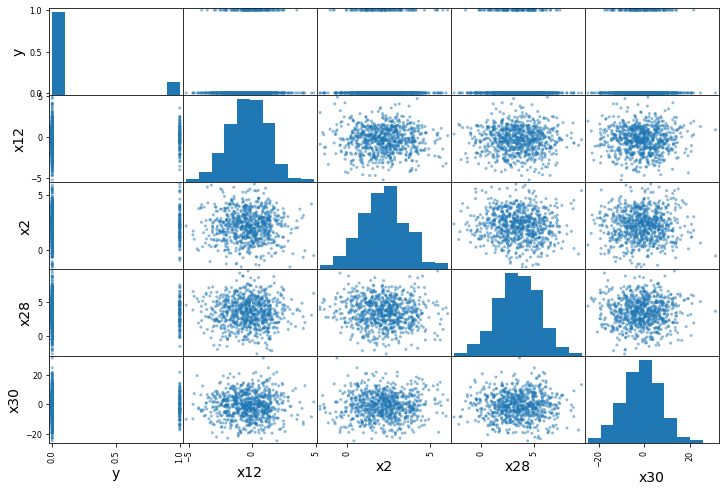

In [13]:
# Viusalizing the highly correlated independent variables with the dependent one y
from pandas.plotting import scatter_matrix
scatter_matrix(syn[['y','x12','x2','x28','x30']], figsize=(12, 8))

Best R^2 for train prediction with Polynomial degree = 1 is  0.026951464314738934
Best MSE for train prediction with Polynomial degree = 1 is  0.1144928926735492
Best R^2 for test prediction with Polynomial degree = 1 is  -0.023518612056782073
Best MSE for test prediction with Polynomial degree = 1 is  0.16209604356731105
Best R^2 for train prediction with Polynomial degree = 2 is  0.25903563814218356
Best MSE for train prediction with Polynomial degree = 2 is  0.10961681337080835
Best R^2 for test prediction with Polynomial degree = 2 is  -0.028646719615902594
Best MSE for test prediction with Polynomial degree = 2 is  0.1896583294031211


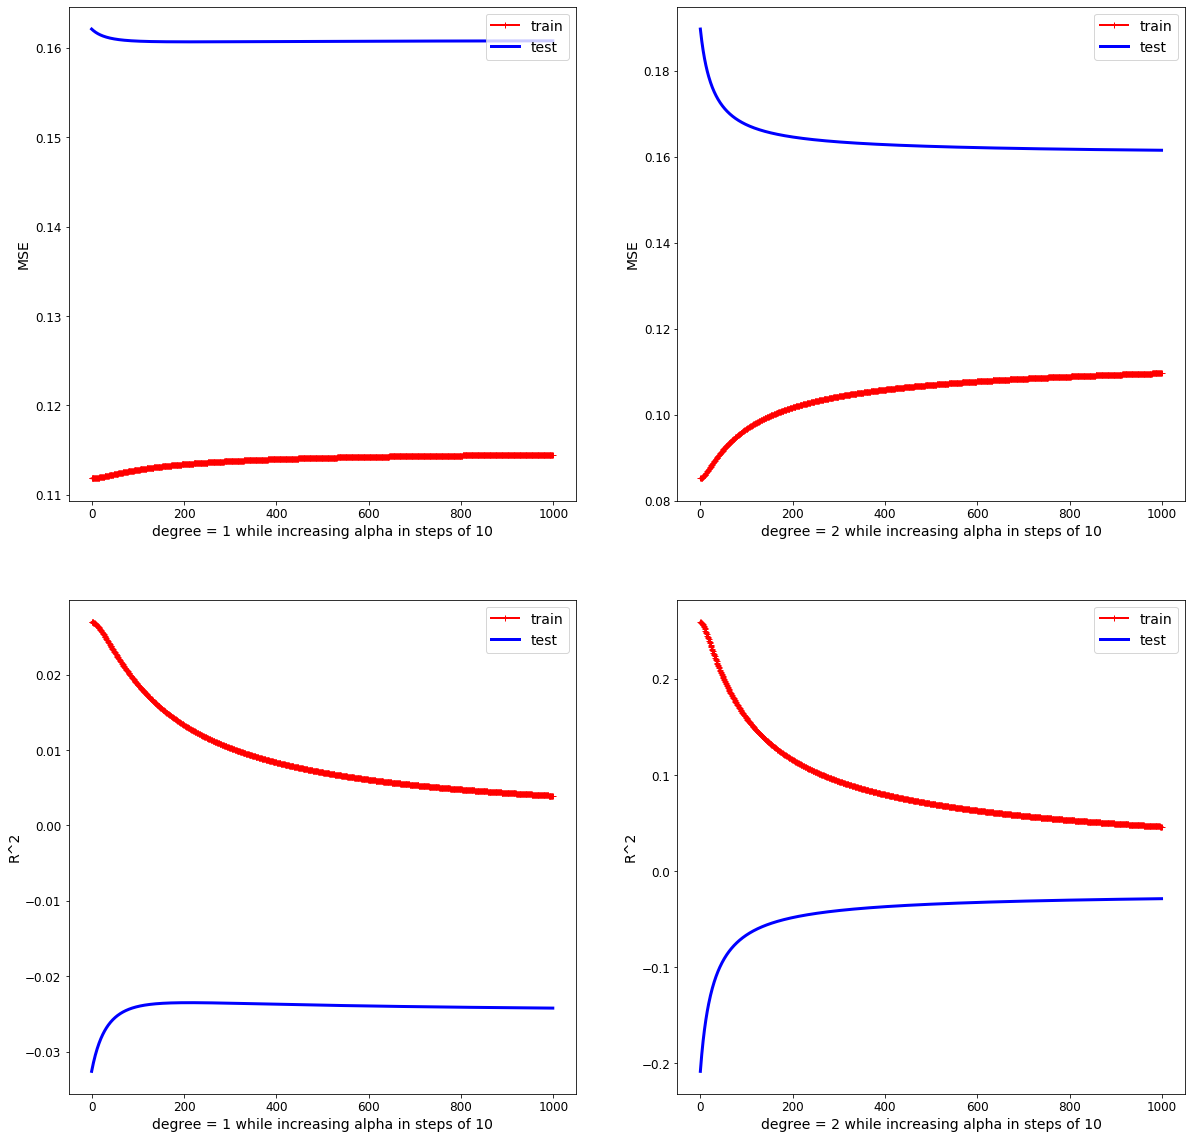

In [18]:
# Applying the below pipeline . Starting by polynomial degree 1 for linear equations and 2 for quadratic equations 
# Following by PCA to overcome the matrix singularity issue due to the low examples and keeping only the vectors with 95% representation of data
#Then Standardizing the data to overcome the outliers issues
#Afterthat using Ridge Regressor which is work better to optimize our cost function whichbased on the mse
#Then Calculating the mse and R^2
#Finally plotting the learning curves in both polynomial degrees while scanning the bestalpha values.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
train_mse, test_mse = [], []
train_score, test_score = [], []
plt.figure(figsize=(20,20))
for degree in range(1,3):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    pca = PCA(n_components=0.95)
    for alpha in range (0,10000,10):
        ridge_reg = Ridge(alpha = alpha,solver = "cholesky")
        polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("pca", pca),
        ("ridge_reg", ridge_reg),])
        polynomial_regression.fit(X_train, y_train)
        pred_train = polynomial_regression.predict(X_train)
        pred_test = polynomial_regression.predict(X_test)
        train_mse.append(mean_squared_error(y_train, pred_train))
        test_mse.append(mean_squared_error(y_test, pred_test))
        train_score.append(polynomial_regression.score(X_train, y_train))
        test_score.append(polynomial_regression.score(X_test, y_test))
    plt.subplot(220 + degree)
    plt.plot(train_mse, "r-+", linewidth=2, label="train")
    plt.plot(test_mse, "b-", linewidth=3, label="test")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("degree = {} while increasing alpha in steps of 10".format(degree), fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.subplot(222 + degree)
    plt.plot(train_score, "r-+", linewidth=2, label="train")
    plt.plot(test_score, "b-", linewidth=3, label="test")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("degree = {} while increasing alpha in steps of 10".format(degree), fontsize=14)
    plt.ylabel("R^2", fontsize=14)
    print('Best R^2 for train prediction with Polynomial degree = {} is '.format(degree),np.max(train_score))
    print('Best MSE for train prediction with Polynomial degree = {} is '.format(degree),np.max(train_mse))
    print('Best R^2 for test prediction with Polynomial degree = {} is '.format(degree),np.max(test_score))
    print('Best MSE for test prediction with Polynomial degree = {} is '.format(degree),np.max(test_mse))
    train_mse, test_mse = [], []
    train_score, test_score = [], []

In [20]:
#Checking the cross validation and getting Beta coefficient for the selected model
from sklearn.model_selection import cross_val_score
polybig_features = PolynomialFeatures(degree=2, include_bias=False)
ridge_reg = Ridge(alpha = 3000,solver = "cholesky")
polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("pca", pca),
        ("ridge_reg", ridge_reg),
    ])
polynomial_regression.fit(X_train, y_train)
cv_scores = []
cv_scores.append(cross_val_score(polynomial_regression,pd.concat([X_train,X_test]), pd.concat([y_train,y_test]), cv=10, scoring='r2'))

In [21]:
print('10 Fold score Mean = {} and Variance = {} with Polynomial degree = {}'.format(np.mean(cv_scores),np.var(cv_scores),degree))
print('The beta coefficients of the ridge predictor are: ' , ridge_reg.coef_)

10 Fold score Mean = -0.05082884388224013 and Variance = 0.002566749048785482 with Polynomial degree = 2
The beta coefficients of the ridge predictor are:  [ 2.35629444e-04 -3.08860753e-04 -9.08112616e-04 -5.20951788e-03
  1.95320488e-03  2.00981593e-03 -1.01598425e-03  2.40627131e-03
 -3.90113061e-03 -1.78083424e-03 -1.66474152e-03 -3.16106897e-04
  3.87629386e-04  1.91895009e-03  6.04566664e-03  2.09211866e-04
  1.43120909e-03 -2.74423931e-03  5.44509719e-05  1.63786145e-03
  3.90356639e-03  2.38740505e-03  3.52291227e-04  3.43455574e-05
 -2.76496618e-03 -7.46205895e-04 -5.87920024e-04 -3.22998461e-03
 -1.37822850e-03  1.88578981e-04 -3.28498522e-03 -3.78799236e-03
 -9.08787315e-04  8.32920746e-04 -5.26493367e-03  6.12848314e-04
  5.14299899e-03  6.72161765e-04 -1.12621939e-03  1.18496293e-03
  4.08320557e-04 -3.32206922e-03 -1.64356724e-03  4.08106732e-03
 -2.13900609e-03  2.83755462e-03 -1.41203532e-03  3.11534929e-04
 -2.59410744e-03 -3.64727694e-03 -2.84813663e-04  1.12542396e-03